In [64]:
# General Libraries
import re
import time
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# Visualizations
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedKFold)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,  
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.model_selection import cross_validate
from sklearn.metrics import (ConfusionMatrixDisplay, precision_score, recall_score)


from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    ConfusionMatrixDisplay, plot_roc_curve

import xgboost as xgb
from lightgbm import LGBMClassifier
from getml.predictors import XGBoostClassifier
import pickle
'''
# Imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import (SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE)
from imblearn.under_sampling import (TomekLinks, NearMiss, AllKNN,
                                     EditedNearestNeighbours, 
                                     RepeatedEditedNearestNeighbours) 
from imblearn.combine import SMOTETomek, SMOTEENN

# SHAP
import shap
'''
import shap
shap.initjs()
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
#%unload_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 16 ms (started: 2022-11-30 21:51:44 +08:00)


In [65]:
import pickle

#change explainer to rh/shap values
pkl_file = open('data/models/explainer.pkl','rb')
explainer = pickle.load(pkl_file)
pkl_file.close()


pkl_file = open('data/models/best_model_lightgbm.pkl', 'rb')
model=pickle.load(pkl_file)
pkl_file.close()


pkl_file = open('data/models/shap_values.pkl', 'rb')
shap_values_test=pickle.load(pkl_file)
pkl_file.close()


#------------------------------------------------------

# (X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, 
#                                                                   random_state=11, test_size=0.25,
#                                                                   stratify=y)

pkl_file = open('data/models/X_trainval.pkl', 'rb')
X_trainval=pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('data/models/X_holdout.pkl', 'rb')
X_holdout=pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('data/models/y_trainval.pkl', 'rb')
y_trainval=pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('data/models/y_holdout.pkl', 'rb')
y_holdout=pickle.load(pkl_file)
pkl_file.close()


time: 15 ms (started: 2022-11-30 21:51:46 +08:00)


In [66]:
#y_preds = model.predict(X_holdout)
y_preds = (model.predict_proba(X_holdout)[:,1] >= 0.5).astype(bool)
holdout_score = accuracy_score(y_holdout, y_preds)
print(f"Holdout set score: {holdout_score:.2f}")

Holdout set score: 0.73
time: 16 ms (started: 2022-11-30 21:51:47 +08:00)


# Global

In [67]:
model

LGBMClassifier()

time: 0 ns (started: 2022-11-30 21:51:48 +08:00)


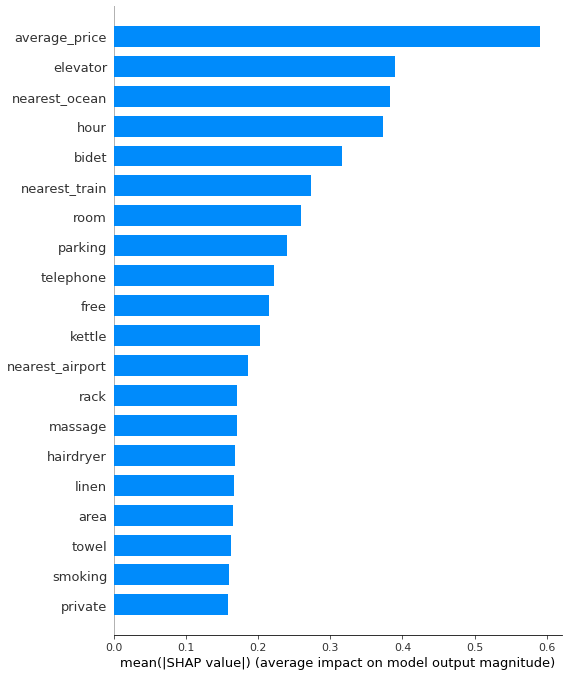

time: 203 ms (started: 2022-11-30 21:51:24 +08:00)


In [62]:
#shap.summary_plot(shap_values_test, X_holdout)
shap.summary_plot(shap_values_test[1], X_holdout, plot_type="bar")

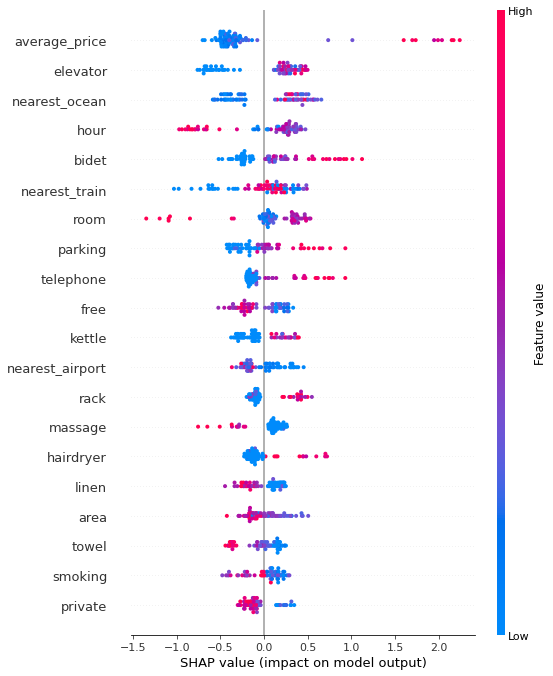

time: 407 ms (started: 2022-11-30 21:56:31 +08:00)


In [69]:


shap.summary_plot(shap_values_test[1], X_holdout, plot_type="dot")

In [53]:
shap.force_plot(explainer.expected_value, shap_values_test[0,:], X_holdout.iloc[0,:])

time: 16 ms (started: 2022-11-30 20:35:59 +08:00)


# Local

In [12]:
df_ho=X_holdout
df_ho=df_ho.reset_index(drop=True)
df_ho.columns.tolist()

['average_price',
 'nearest_airport',
 'ave_airport',
 'nearest_resto',
 'nearest_train',
 'nearest_ocean',
 'nearest_other',
 'number_close',
 'nearest_other_2km',
 'latitude',
 'longitude',
 'access',
 'accessible',
 'additional',
 'adult',
 'aerobic',
 'age',
 'aid',
 'air',
 'airport',
 'alarm',
 'arabic',
 'archery',
 'area',
 'art',
 'atm',
 'available',
 'baby',
 'babysitte',
 'back',
 'baggage',
 'balcony',
 'banquet',
 'bar',
 'basket',
 'bath',
 'bathrobe',
 'bathroom',
 'bathtub',
 'bbq',
 'beach',
 'beauty',
 'bed',
 'bicycle',
 'bidet',
 'bike',
 'board_game',
 'body',
 'book',
 'bowl',
 'bowling',
 'braille',
 'breakfast',
 'broadcast',
 'buffet',
 'business',
 'cable',
 'car',
 'carbon',
 'card',
 'carpet',
 'casino',
 'cctv',
 'center',
 'chair',
 'champagne',
 'channel',
 'chapel',
 'check',
 'child',
 'class',
 'clean',
 'cleaning',
 'clock',
 'closet',
 'clothe',
 'clothing',
 'club',
 'coffee',
 'color',
 'common',
 'concierge',
 'condition',
 'conditioning',
 'conv

time: 16 ms (started: 2022-11-30 19:46:50 +08:00)


In [9]:
y_preds
data=y_holdout.to_frame()
data["prediction"]=y_preds
data = data.reset_index(drop=True)
data[(data.is_good_stay==1) & (data.prediction==0)]


,is_good_stay,prediction
0,1,False
1,1,False
5,1,False
6,1,False
9,1,False
...,...,...
14401,1,False
14405,1,False
14406,1,False
14409,1,False


time: 0 ns (started: 2022-11-28 15:11:35 +08:00)


<AxesSubplot:ylabel='Frequency'>

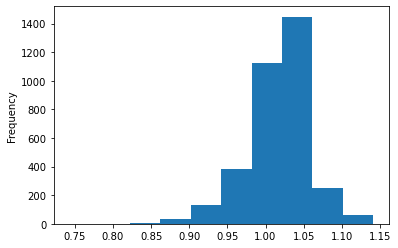

time: 125 ms (started: 2022-11-09 11:31:32 +08:00)


In [33]:
X_holdout.IXIC_d_MA50.plot.hist()

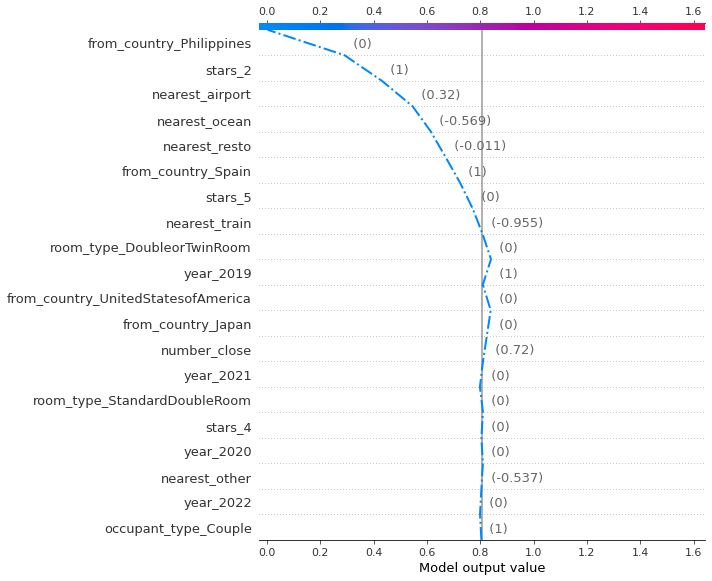

time: 359 ms (started: 2022-11-28 15:15:44 +08:00)


In [11]:
num=14409

expected_value = explainer.expected_value[1]
shap.decision_plot(expected_value, shap_values_test[1][num],\
                   X_holdout.iloc[num], highlight=0)

In [43]:
display(X_holdout.iloc[[num]])
print("y_holdout actual- %s"  % (y_holdout.iloc[num]))
print("y_holdout pred- %s"  % (y_preds[num]))


,PSEI_RSI14,PSEI_d_MA10,PSEI_d_MA20,PSEI_d_MA50,PSEI_d_MA200,IXIC_RSI14,IXIC_d_MA10,IXIC_d_MA20,IXIC_d_MA50,IXIC_d_MA200,...,Industry_SavingsBanks,Industry_Semiconductors,Industry_SpecialtyStores,Industry_SpecialtyTelecommunications,Industry_Steel,Industry_Trucking,Industry_TrucksConstructionFarmMachinery,Industry_WaterUtilities,Industry_WholesaleDistributors,Industry_WirelessTelecommunications
11418,45.88726,0.990851,0.990055,1.000588,0.77103,62.960162,1.019956,1.03812,1.125578,1.097481,...,0,0,0,0,0,0,0,0,0,0


y_holdout actual- 1
y_holdout pred- True
time: 15 ms (started: 2022-11-09 11:43:41 +08:00)


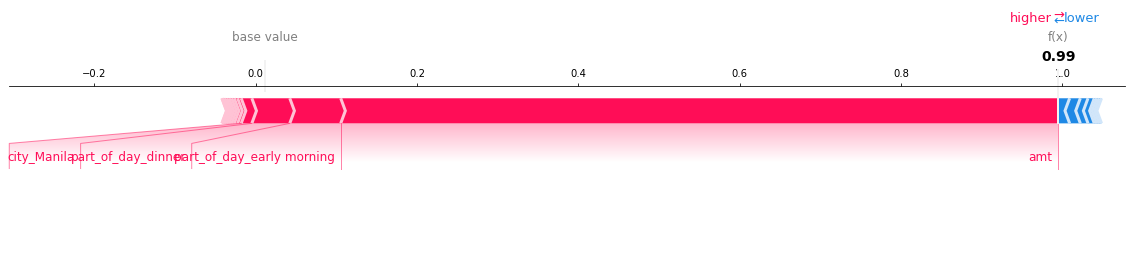

time: 312 ms (started: 2022-10-27 20:32:15 +08:00)


In [117]:
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][2538], X_holdout.columns, matplotlib=True)

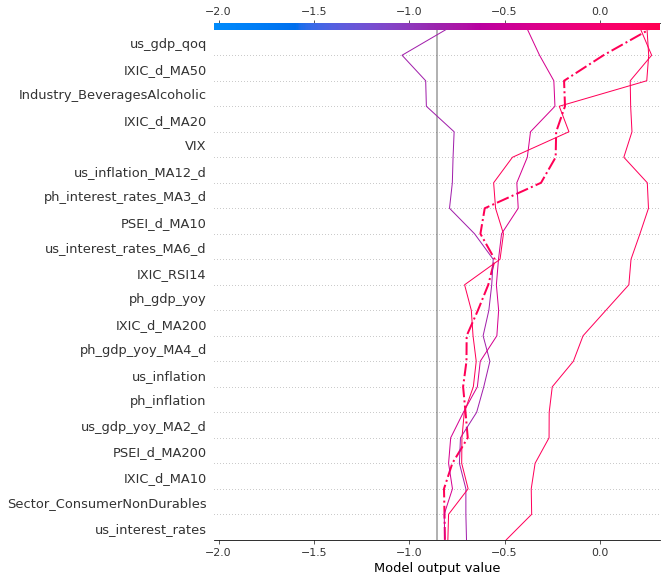

time: 266 ms (started: 2022-11-09 11:44:55 +08:00)


In [44]:
my_list=[7,13,19,30,32]
a=np.array(my_list)

shap.decision_plot(expected_value, shap_values_test[1][a],\
                   X_holdout.iloc[a], highlight=0)

## Test

In [108]:
num=2538

expected_value = explainer.expected_value[1]
shap.decision_plot(expected_value, shap_values[1][num],\
                   X_holdout.loc[num], highlight=0)

KeyError: 2538

time: 31 ms (started: 2022-10-27 20:30:33 +08:00)


In [100]:
sample_test_idx

array([ 162,   -1,   -1,   -1,   -1,   -1,   -1,   -1, 1965], dtype=int64)

time: 0 ns (started: 2022-10-27 20:23:53 +08:00)


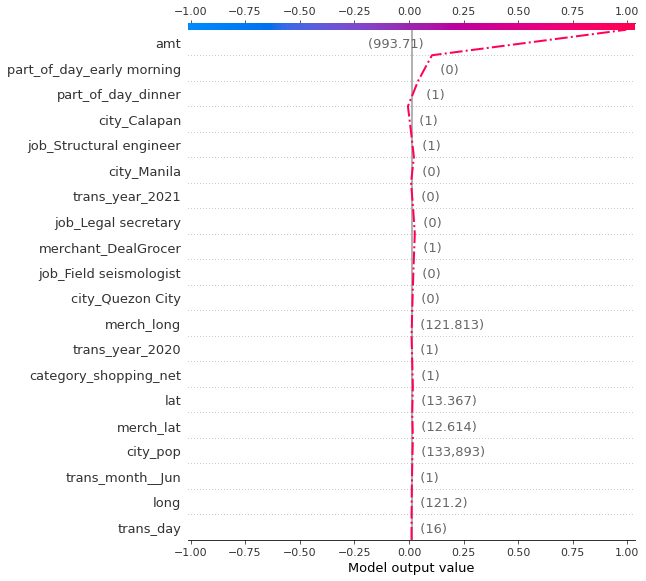

time: 407 ms (started: 2022-10-27 20:23:06 +08:00)


In [98]:
orig_plt_params = plt.rcParams
#Get indexes for a Group of Points
sample_test_idx = X_holdout.index.\
                    get_indexer_for([5,6,7,18,19,21,24,25,27])

#To highlight False Negatives from these points
FN = (y_preds[sample_test_idx] == 1) &\
     (y_holdout.iloc[sample_test_idx] == 0).to_numpy() 

#Set the expected value for the positive class
expected_value = explainer.expected_value[1]

#Reset matplotlib style so that it's not seaborn's
#sns.reset_orig()
#plt.rcParams.update(orig_plt_params)

#Display decision plot with FN highlighted
shap.decision_plot(expected_value, shap_values[1][num],\
                   X_holdout.iloc[num], highlight=0)


In [106]:
shap.force_plot(explainer.expected_value, 
                shap_values[num], X_holdout.columns, matplotlib=True)

IndexError: list index out of range

time: 16 ms (started: 2022-10-27 20:29:53 +08:00)
